In [48]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from skimage.io import imread

In [5]:
'''generated scene graph'''
emb_file = '/data/project/rw/CBIR/glove_embs_vg_coco_sg_butd.pkl'
vocab2idx_file = '/data/project/rw/CBIR/vocab2idx_vg_coco_sg_butd.pkl'
idx2vocab_file = '/data/project/rw/CBIR/idx2vocab_vg_coco_sg_butd.pkl'
scene_graph_path = '/data/project/rw/CBIR/vg_generated_sg_butd_freq_whole_format_v2.json'

'''GT scene graph'''    
gen_scene_graph = '/data/project/rw/CBIR/vg_generated_sg_adj_full_butd_freq_train.pkl'   

In [24]:
gen_scene_graph_test = "/data/project/rw/CBIR/vg_generated_sg_adj_full_butd_freq_test.pkl"

In [92]:
scene_graph_train = '/data/project/rw/CBIR/scene_graph_with_adj_train.pkl'
scene_graph_test = '/data/project/rw/CBIR/scene_graph_with_adj_test.pkl'

In [25]:
# sg = pickle.load(open(gen_scene_graph, 'rb'))
sg2 = pickle.load(open(gen_scene_graph_test, 'rb'))

In [93]:
sg2 = pickle.load(open(scene_graph_test, 'rb'))

In [96]:
sg2[next(iter(sg2))]

{'node_labels': ['suit',
  'black',
  'man',
  'sitting',
  'smiling',
  'tie',
  'purple',
  'pewter colored',
  'maroon',
  'woman',
  'smiling',
  'suit',
  'shirt',
  'white',
  'nose',
  'big',
  'table',
  'brown',
  'wooden',
  'small',
  'round',
  'worn',
  'eyes',
  'earring',
  'black',
  'stone',
  'black pearl',
  'ear',
  'clip',
  'metal',
  'silver',
  'belt',
  'black',
  'hand',
  'hair',
  'black',
  'button',
  'sleave',
  'tree',
  'leaves',
  'tree',
  'trunk',
  'loop',
  'hand',
  'shoulder',
  'building',
  'white',
  'hand',
  'hair',
  'pulled back',
  'wearing',
  'wearing',
  'wearing',
  'whispering to',
  'wearing',
  'has',
  'has',
  'wearing',
  'in',
  'on',
  'on',
  'speaking to',
  'has',
  'wearing',
  'wearing',
  'wearing',
  'on',
  'wearing',
  'behind',
  'has',
  'has',
  'under',
  'speaking to',
  'has a',
  'on',
  'in front of',
  'has',
  'on',
  'wearing',
  'wearing',
  'wearing',
  'over',
  'on top of',
  'on',
  'has',
  'whisperin

In [98]:
obj_count = {}
for img_id in img_ids:
    sg_ = sg2[str(img_id)]
#     obj_count[img_id] = len(sg_['obj_labels'])
    obj_count[img_id] = len(sg_['node_labels'])

In [30]:
vg_img = '/data/public/rw/datasets/visual_genome/VG_100K/{}.jpg'

In [3]:
df_result = pd.read_csv('results_v1_201911141704_final.csv')
df_triplet = pd.read_csv('triplets_v1_201911102026.csv')
df_triplet = df_triplet.set_index('triplet_id')

In [62]:
def show_triplet(triplet_id):
    row = df_triplet.loc[triplet_id]
    fig, axs = plt.subplots(ncols=3, figsize=(20,5))
    axs[0].imshow(imread(vg_img.format(str(row['query_id']))))
    axs[1].imshow(imread(vg_img.format(str(row['target_id1']))))    
    axs[2].imshow(imread(vg_img.format(str(row['target_id2']))))    

In [90]:
df_triplet.loc[1904]

query_id           2320770
target_id1         2343304
target_id2         2342628
query_obj_cnt           26
target1_obj_cnt         26
target2_obj_cnt         25
Name: 1904, dtype: int64

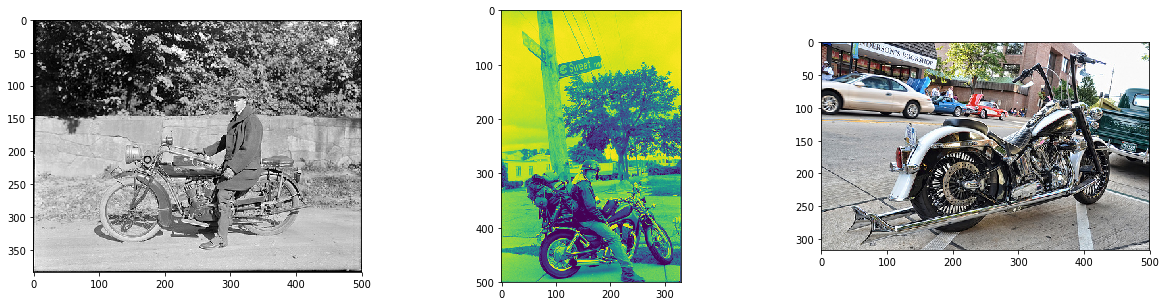

In [106]:
show_triplet(2985)

In [95]:
# sg2['2320770']

In [44]:
'''filter users with low answer count (<10)'''
filter_count = 10
user_count = df_result.groupby('user_id').count()['id']
l_filtered_users = (user_count[user_count > filter_count]).index.to_list()
print(l_filtered_users)
print(len(l_filtered_users))

['Dray.Choe', 'IceAmericano', 'JRW', 'Jinyeong', 'Jonggwon', 'Julyeon Seo', 'LSW', 'chico2121', 'cjhan', 'cnuh', 'dhkwak', 'edwin.kang', 'eos73', 'epsilon.kim', 'erin122', 'eunjin', 'hans', 'hexa.ai', 'hihello', 'hihello2', 'hyunji', 'ian.theman', 'jay.mini', 'jihoon.lee', 'jinhyun.b', 'junojuno', 'kwon.g', 'motherfathergentleman', 'robert.p', 'scarlett.heo', 'sungbin.lim', 'wookee3', 'woong.ssang', 'yejun', 'yoomin618']
35


In [100]:
df_triplet.head()

,query_id,target_id1,target_id2,query_obj_cnt,target1_obj_cnt,target2_obj_cnt
triplet_id,,,,,,
1,2338816,2338871,2317047,41,22,152
2,2338816,2330684,2339602,41,34,13
3,2338816,2324945,2416236,41,44,71
4,2338816,2340743,2415852,41,91,59
5,2338816,2342962,2411692,41,154,149


In [99]:
df_triplet['query_obj_cnt'] = df_triplet['query_id'].apply(lambda x: obj_count[x])
df_triplet['target1_obj_cnt'] = df_triplet['target_id1'].apply(lambda x: obj_count[x])
df_triplet['target2_obj_cnt'] = df_triplet['target_id2'].apply(lambda x: obj_count[x])

In [104]:
df_triplet['query_obj_cnt'].sort_values()[:30]

triplet_id
5465    7
2983    7
2984    7
2985    7
2986    7
2987    7
2988    7
2989    7
2990    7
2982    7
2981    7
5470    7
5469    7
5468    7
5467    7
5466    7
5464    7
5463    7
5461    7
5462    7
140     8
132     8
133     8
139     8
138     8
137     8
136     8
135     8
134     8
131     8
Name: query_obj_cnt, dtype: int64

In [42]:
df_triplet.head()

,query_id,target_id1,target_id2,query_obj_cnt,target1_obj_cnt,target2_obj_cnt
triplet_id,,,,,,
1,2338816,2338871,2317047,33,32,33
2,2338816,2330684,2339602,33,17,23
3,2338816,2324945,2416236,33,25,17
4,2338816,2340743,2415852,33,21,21
5,2338816,2342962,2411692,33,37,27


In [45]:
'''prepare answer_cnt'''
answer_cnt = df_result[['id', 'triplet_id', 'answer']].pivot_table(index='triplet_id', columns='answer', aggfunc='count').fillna(0)
answer_cnt.columns = answer_cnt.columns.droplevel(0)
answer_cnt = answer_cnt.rename(columns={0:'o1', 1:'o2', 2:'both', 3:'neither'})
answer_cnt['o3'] = answer_cnt['both'] + answer_cnt['neither']
answer_cnt.head()

answer,o1,o2,both,neither,o3
triplet_id,,,,,
1,1.0,2.0,0.0,0.0,0.0
2,0.0,2.0,2.0,0.0,2.0
3,4.0,0.0,1.0,0.0,1.0
4,0.0,3.0,0.0,0.0,0.0
5,5.0,0.0,0.0,0.0,0.0


In [56]:
answer_cnt['o3'] / answer_cnt.sum(axis=1)

triplet_id
1        0.000000
2        0.333333
3        0.166667
4        0.000000
5        0.000000
           ...   
9996     0.400000
9997     0.000000
9998     0.000000
9999     0.000000
10000    0.000000
Length: 9925, dtype: float64

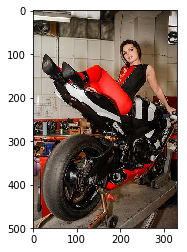

In [34]:
plt.imshow(imread(vg_img.format('2320168')))

In [49]:
'''user agreement'''
user_agree = {'user': [], 'score': []}
# for user in l_users:
for user in l_filtered_users:    
    print(user)
    df_answer_person = df_result[df_result['user_id'] == user].sort_values('triplet_id')
    l_score = []
    for i, row in df_answer_person.iterrows():
        triplet_id = row['triplet_id']
        if row['answer'] not in (0, 1, 2):
            continue

        answer = answer_cnt.loc[triplet_id]
        o1, o2, o3, p, q = answer['o1'], answer['o2'], answer['o3'], answer['both'], answer['neither']

#         o1, o2 = answer['o1'], answer['o2']
#         o3 = len(l_users) - o1 - o2

        # requires more than two active votes for the triplet
        if o1 + o2 < 2:
            continue

        if row['answer'] in {0, 1}:
            if row['answer'] == 0:
                oi = o1
            else:
                oi = o2
            s = (oi + 0.5 * p  - 1) / (o1 + o2 + p + q - 1)
        elif row['answer'] == 2:
            s = (0.5 * o1 + 0.5 * o2 + p - 1 ) / (o1 + o2 + p + q - 1)
        else:
            s = 0
#             s = (q - 1) / (o1 + o2 + p + 1 - 1)
        

#         s = (o1 + o2 - 1) / (o1 + o2 + o3 - 1) * (oi - 1) / (o1 + o2 - 1)
        

        l_score.append(s)
    score = np.mean(l_score)
    user_agree['user'].append(user)
    user_agree['score'].append(score)
user_agree = pd.DataFrame(user_agree)    
user_agree.head()
print(user_agree.mean(), user_agree.std())

Dray.Choe
IceAmericano
JRW
Jinyeong
Jonggwon
Julyeon Seo
LSW
chico2121
cjhan
cnuh
dhkwak
edwin.kang
eos73
epsilon.kim
erin122
eunjin
hans
hexa.ai
hihello
hihello2
hyunji
ian.theman
jay.mini
jihoon.lee
jinhyun.b
junojuno
kwon.g
motherfathergentleman
robert.p
scarlett.heo
sungbin.lim
wookee3
woong.ssang
yejun
yoomin618
score    0.690198
dtype: float64 score    0.040811
dtype: float64


In [50]:
user_agree

,user,score
0,Dray.Choe,0.699721
1,IceAmericano,0.681861
2,JRW,0.695402
3,Jinyeong,0.690828
4,Jonggwon,0.646605
5,Julyeon Seo,0.646518
6,LSW,0.696163
7,chico2121,0.674185
8,cjhan,0.643372
9,cnuh,0.598404


In [20]:
img_ids = df_triplet['query_id'].tolist() + df_triplet['target_id1'].tolist() \
          + df_triplet['target_id2'].tolist()
img_ids = list(set(img_ids))

In [23]:
len(img_ids)

8413

In [27]:
next(iter(sg2))

'2320168'

24

In [17]:
c = set(df_triplet['target_id2'].tolist())

In [14]:
len(a)

1000

In [16]:
len(b)

5663

In [8]:
len(sg)

35017